In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetic_type={'No_DR':0,'Mild':1,'Moderate':2,'Severe':3,'Proliferate_DR':4}

In [ ]:
def load_imgs(impath):
    imgs=[]
    #imgs1=[]
    label=[]
    #label1=[]
    plot=[]
    l1=os.listdir(impath)
    for i in l1:
        c=0
        l2=os.listdir(impath+'/'+i)
        for j in l2:
            if c<=2000:
                img=Image.open(impath+i+'/'+j)
                img=img.resize(size=(128,128))
                plot.append(img)
                #img=img.convert('L')
                img=np.array(img,dtype=np.float16)/255
                imgs.append(img) #.flatten())
                label.append(i)
                del img
                c=c+1


    return np.array(imgs),label,plot

In [ ]:
x,y,plot_imgs=load_imgs('/content/drive/Shareddrives/Project2024/mini_project/colored_images/')

In [ ]:
x.shape

(3662, 128, 128, 3)

In [ ]:
len(y)

3662

In [ ]:
x[0],y[0]

(array([[[0.00392 , 0.      , 0.      ],
         [0.00392 , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.00392 , 0.      , 0.      ],
         [0.      , 0.00392 , 0.      ],
         [0.      , 0.      , 0.      ]],
 
        [[0.00392 , 0.      , 0.      ],
         [0.      , 0.00392 , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.00392 , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ]],
 
        [[0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         [0.      , 0.      , 0.      ],
         ...,
         [0.00392 , 0.00392 , 0.      ],
         [0.00392 , 0.      , 0.      ],
         [0.00392 , 0.      , 0.      ]],
 
        ...,
 
        [[0.00392 , 0.00392 , 0.00784 ],
         [0.00392 , 0.00392 , 0.00392 ],
         [0.011765, 0.00392 , 0.00784 ],
         ...,
         [0.      , 0.      , 0.      ],
         [0.00392 

In [ ]:
t=[]
for i in y:
  t.append(diabetic_type.get(i))

In [ ]:
t[0:2000:500]

[2, 2, 3, 0]

In [ ]:
target=pd.Series(t,dtype='category')

In [ ]:
print(target.value_counts())

0    1805
2     999
1     370
4     295
3     193
dtype: int64


In [ ]:
target[0]

2

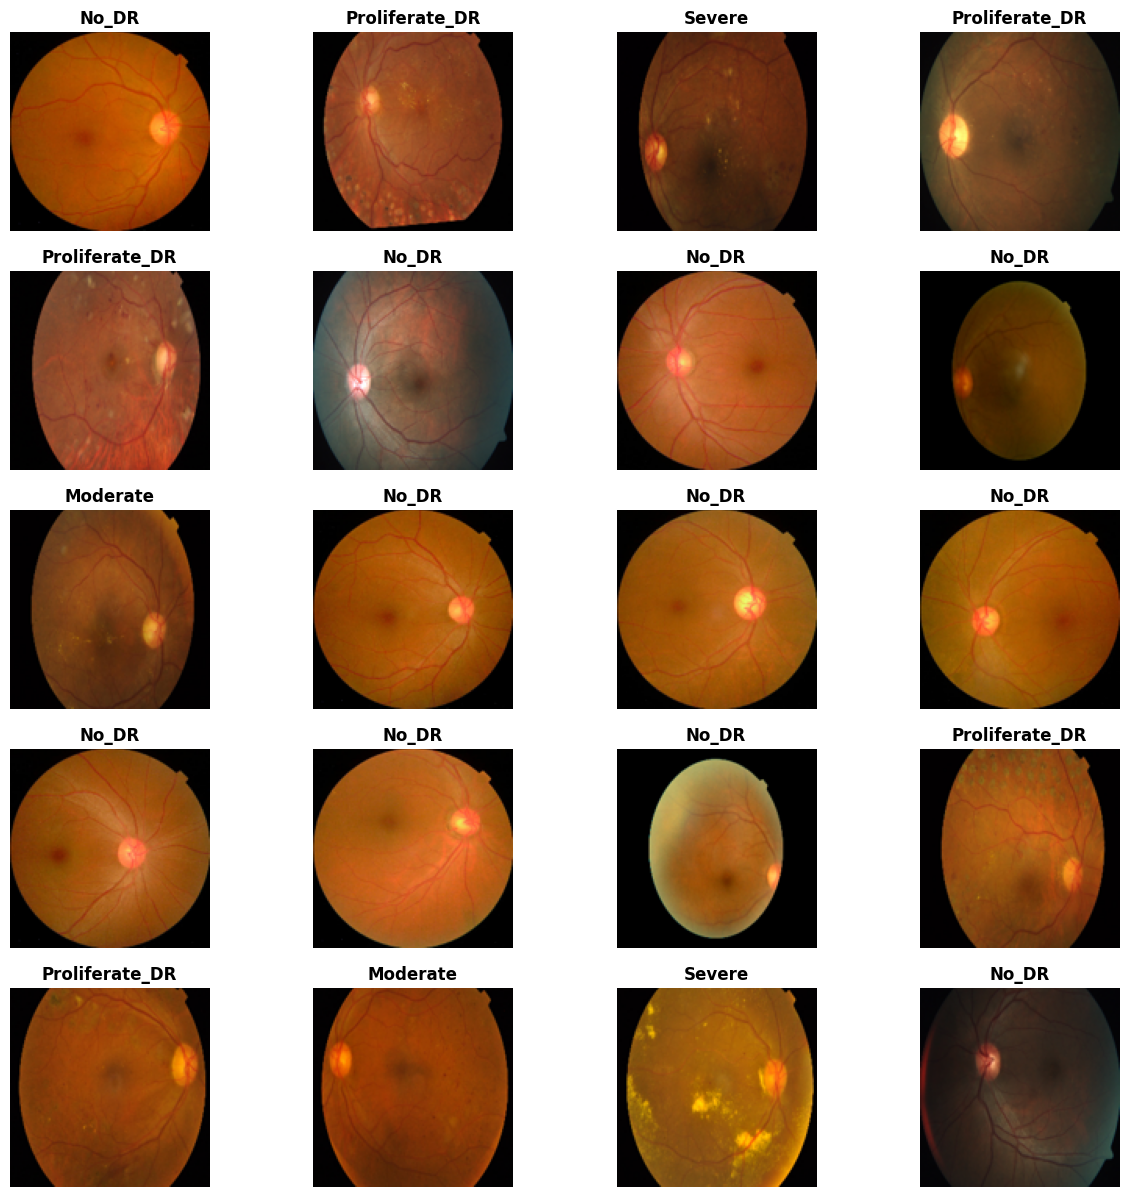

In [ ]:
fig=plt.figure(figsize=(15,15))
for i in range(1,21):
  img=np.random.randint(1,3600)
  fig.add_subplot(5,4,i)
  plt.imshow(plot_imgs[img])
  plt.title(y[int(img)],fontdict={'fontsize':12},weight='bold')
  plt.axis('off')


plt.show()



In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import itertools
import tensorflow as tf
from tensorflow.keras import models
tf.config.run_functions_eagerly(True)
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet152, Xception,VGG16,EfficientNetB4
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D,GlobalMaxPooling2D,BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
np.random.seed(123)
print("done")

done


In [ ]:
y1 = tf.keras.utils.to_categorical(target, num_classes=5)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,shuffle=True)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2929, 128, 128, 3), (733, 128, 128, 3), (2929, 5), (733, 5))

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)

In [ ]:
y_train[3]

array([0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
x_train.shape,x_validate.shape

((2636, 128, 128, 3), (293, 128, 128, 3))

In [ ]:
optimizer = Adam(learning_rate=0.001)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=4, verbose=1, factor=0.5, min_learning_rate=0.00001)
#mcp = tf.keras.callbacks.ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=10)

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/Project2024/mini_project/checkpoints/CNN/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#Basic CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 average_pooling2d (Average  (None, 64, 64, 64)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs = 100, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 100
                              , callbacks=[model_checkpoint_callback,learning_rate_reduction,es])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
26/26 [==============================] - 25s 416ms/step - loss: 1.2691 - accuracy: 0.4962 - val_loss: 1.1392 - val_accuracy: 0.5973 - lr: 0.0010
Epoch 2/100
26/26 [==============================] - 6s 220ms/step - loss: 0.9726 - accuracy: 0.6608 - val_loss: 0.9716 - val_accuracy: 0.5973 - lr: 0.0010
Epoch 3/100
26/26 [==============================] - 6s 246ms/step - loss: 0.8566 - accuracy: 0.6825 - val_loss: 0.9229 - val_accuracy: 0.6451 - lr: 0.0010
Epoch 4/100
26/26 [==============================] - 6s 227ms/step - loss: 0.8069 - accuracy: 0.7018 - val_loss: 0.8919 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 5/100
26/26 [==============================] - 6s 228ms/step - loss: 0.7923 - accuracy: 0.7113 - val_loss: 0.8855 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 6/100
26/26 [==============================] - 6s 232ms/step - loss: 0.7814 - accuracy: 0.7136 - val_loss: 0.8137 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 7/100
26/26 [==============================] - 6s 224ms/s

In [ ]:
model.save('my_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
model=models.load_model('my_cnn.h5')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

23/23 [==============================] - 1s 23ms/step


In [ ]:
loss,accuracy

(0.7887028455734253, 0.727148711681366)

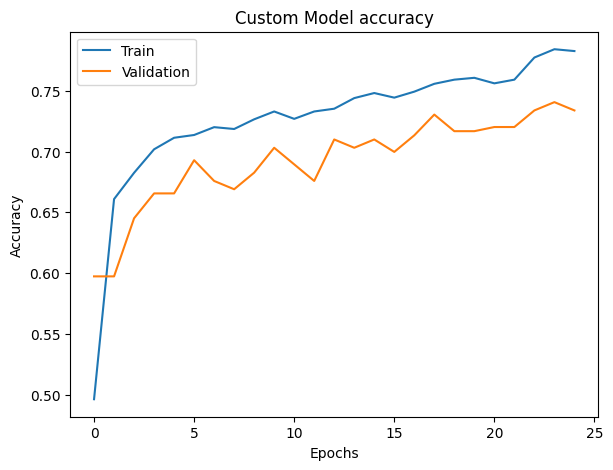

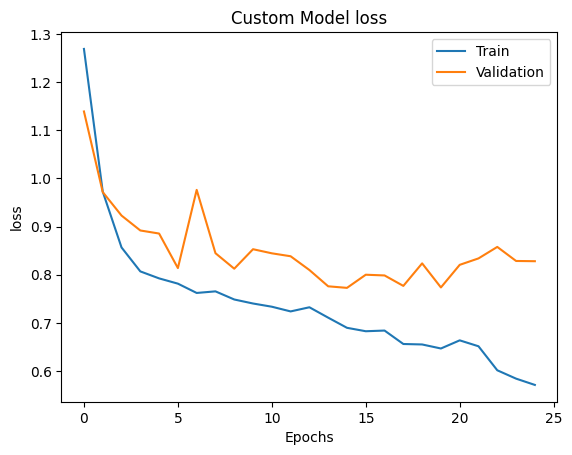

In [ ]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
predictions

array([[2.5166179e-05, 1.0245151e-06, 9.6929985e-01, 2.6672989e-02,
        4.0009324e-03],
       [1.3180248e-01, 2.2397856e-01, 3.9495867e-01, 1.5952192e-01,
        8.9738376e-02],
       [1.0000000e+00, 4.6419249e-12, 3.7768305e-13, 2.6984877e-14,
        2.2563405e-10],
       ...,
       [2.2964797e-03, 1.3092531e-01, 8.5055536e-01, 4.1434849e-03,
        1.2079425e-02],
       [1.0058401e-02, 7.0589259e-02, 3.2868052e-01, 5.5660480e-01,
        3.4067031e-02],
       [8.8479156e-03, 6.2016804e-02, 5.9667927e-01, 5.7809625e-02,
        2.7464640e-01]], dtype=float32)

In [ ]:
len(predictions)

733

In [ ]:
a=[]
for i in range(0,733):
  a.append(np.argmax(predictions[i],axis=0))
len(a)

733

In [ ]:
b=[]
for i in range(0,len(y_test)):
  b.append(np.argmax(y_test[i]))
len(b)

733

In [ ]:
confusion_matrix=metrics.confusion_matrix(b,a)

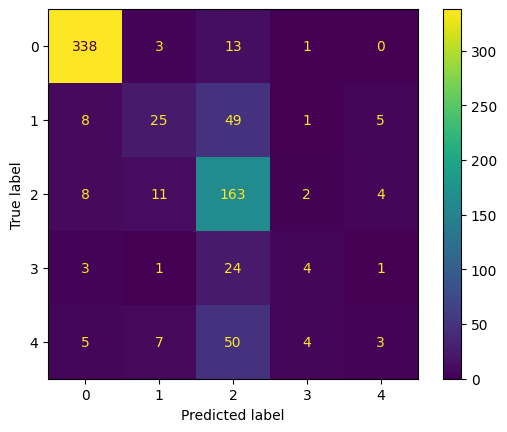

In [ ]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

In [ ]:
y_test[0]

array([0., 0., 1., 0., 0.], dtype=float32)

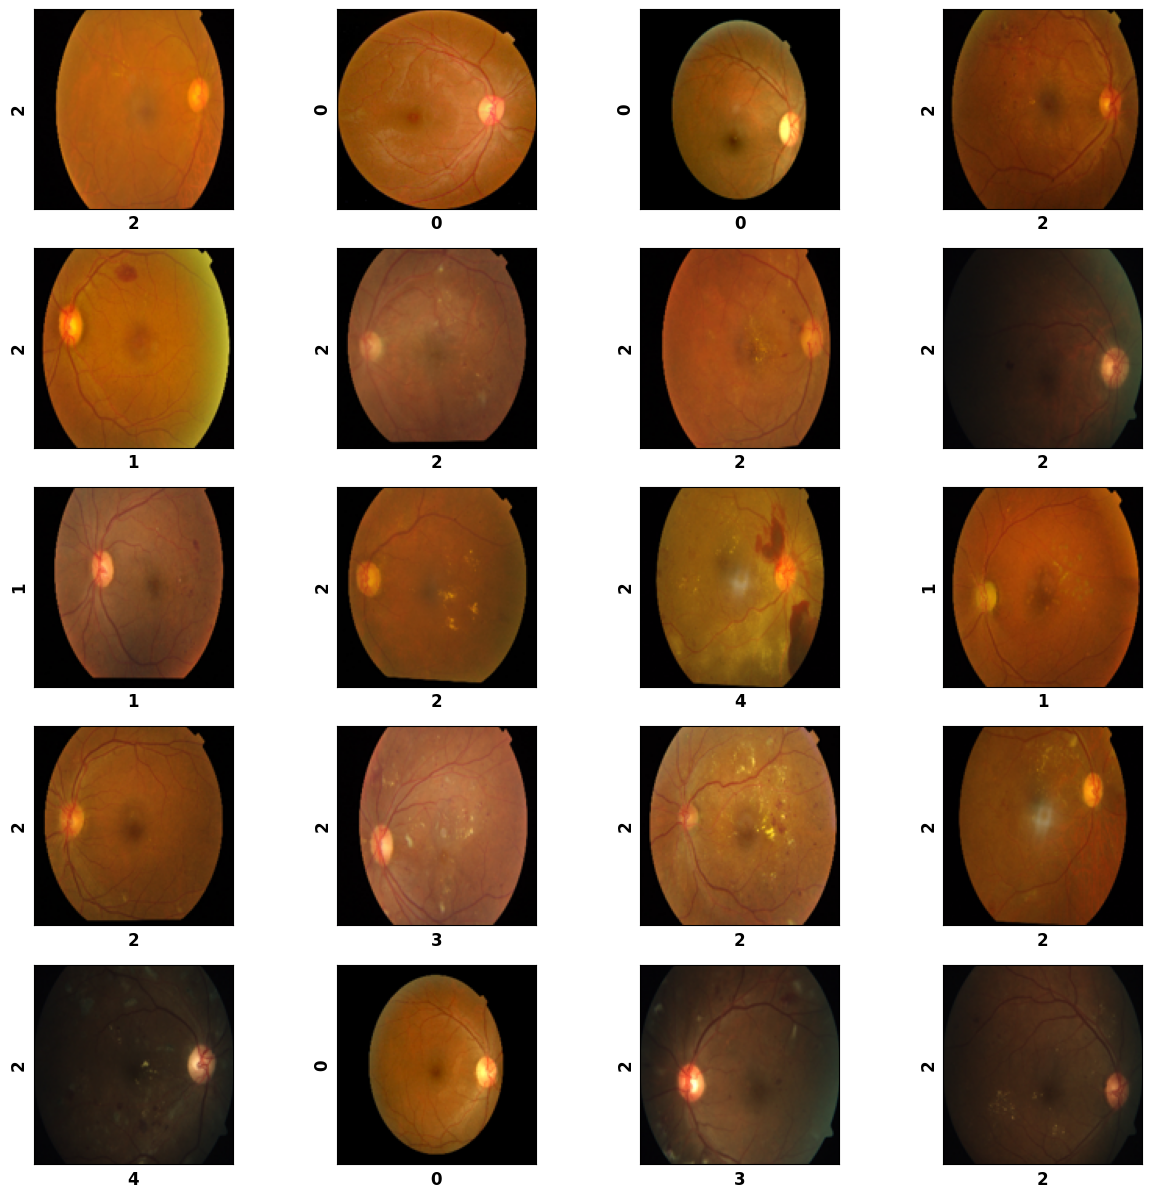

In [ ]:
plot_x_test=(x_test*255).astype(np.uint8)
fig=plt.figure(figsize=(15,15))
for j in range(1,21):
  img=np.random.randint(0,733)
  fig.add_subplot(5,4,j)
  plt.imshow(plot_x_test[img])
  #plt.title(y[int(img)],fontdict={'fontsize':12},weight='bold')
  plt.xlabel(b[img],fontdict={'fontsize':12},weight='bold')
  plt.ylabel(a[img],fontdict={'fontsize':12},weight='bold')
  plt.xticks([])
  plt.yticks([])
plt.show()

#vgg16

In [ ]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (128,128, 3) ,
include_top = False,
weights = 'imagenet')
print("done")

58889256/58889256 [==============================] - 0s 0us/step
done


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
checkpoint_filepath1 = '/content/drive/Shareddrives/Project2024/mini_project/checkpoints/vgg16/'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
vggmodel=tensorflow.keras.models.Sequential()
vggmodel.add(base_model)
vggmodel.add(layers.Flatten())
vggmodel.add(layers.BatchNormalization())
vggmodel.add(layers.Dense(256,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(BatchNormalization())
vggmodel.add(layers.Dense(128,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(BatchNormalization())
vggmodel.add(layers.Dense(64,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(BatchNormalization())
vggmodel.add(layers.Dense(5,activation='softmax'))
vggmodel.compile(loss="categorical_crossentropy",optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])


In [ ]:
history=vggmodel.fit(x_train,y_train, validation_data =(x_validate,y_validate),batch_size=32,epochs=100,verbose=1,callbacks=[model_checkpoint_callback1,learning_rate_reduction,es])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
83/83 [==============================] - 28s 268ms/step - loss: 1.3255 - accuracy: 0.5250 - val_loss: 0.9515 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 18s 213ms/step - loss: 1.0003 - accuracy: 0.6449 - val_loss: 0.9121 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 3/100
83/83 [==============================] - 18s 216ms/step - loss: 0.8877 - accuracy: 0.6939 - val_loss: 0.8675 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 4/100
83/83 [==============================] - 19s 228ms/step - loss: 0.8347 - accuracy: 0.7056 - val_loss: 0.8344 - val_accuracy: 0.6962 - lr: 0.0010
Epoch 5/100
83/83 [==============================] - 18s 212ms/step - loss: 0.8213 - accuracy: 0.7105 - val_loss: 0.8277 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 6/100
83/83 [==============================] - 18s 220ms/step - loss: 0.7950 - accuracy: 0.7246 - val_loss: 0.7818 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 7/100
83/83 [==============================] - 18s 2

In [ ]:
vggmodel.save('my_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#vggmodel.load_weights(checkpoint_filepath1)

In [ ]:
vggmodel=models.load_model('my_vgg16.h5')

In [ ]:
vgg_loss, vgg_accuracy = vggmodel.evaluate(x_test, y_test)
vgg_predictions = vggmodel.predict(x_test)

23/23 [==============================] - 1s 59ms/step


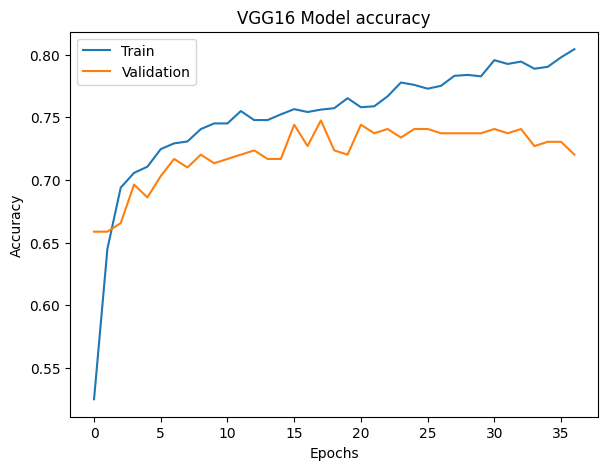

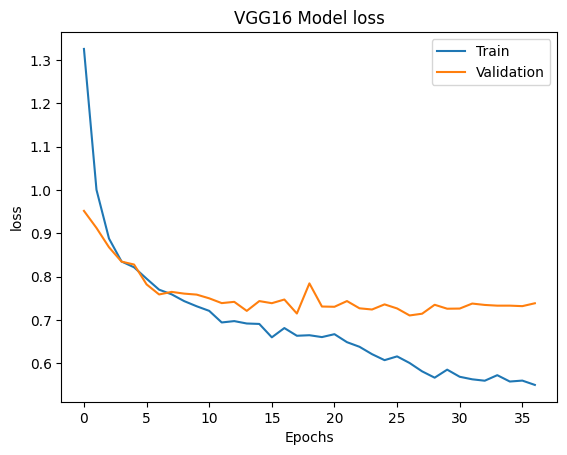

In [ ]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
a1=[]
for i in range(0,733):
  a1.append(np.argmax(vgg_predictions[i],axis=0))
len(a1)

733

In [ ]:
confusion_matrix=metrics.confusion_matrix(b,a1)

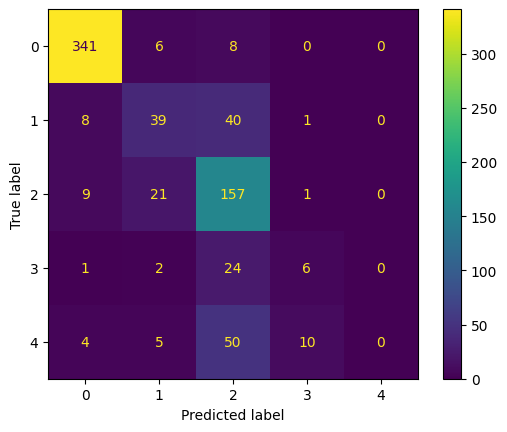

In [ ]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

#Resnet50

In [ ]:
input_t=tensorflow.keras.Input(shape=(128,128,3))
res_model=tensorflow.keras.applications.ResNet50(include_top=False,weights="imagenet",input_tensor=input_t)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in res_model.layers[:143]:
  layer.trainable=False

In [ ]:
checkpoint_filepath2 = '/content/drive/Shareddrives/Project2024/mini_project/checkpoints/resnet50/'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
resmodel=tensorflow.keras.models.Sequential()
resmodel.add(res_model)
resmodel.add(layers.Flatten())
resmodel.add(layers.BatchNormalization())
resmodel.add(layers.Dense(512,activation='relu'))
resmodel.add(Dropout(0.5))
resmodel.add(BatchNormalization())
resmodel.add(layers.Dense(128,activation='relu'))
resmodel.add(Dropout(0.5))
resmodel.add(BatchNormalization())
resmodel.add(layers.Dense(64,activation='relu'))
resmodel.add(Dropout(0.5))
resmodel.add(BatchNormalization())
resmodel.add(layers.Dense(5,activation='softmax'))

In [ ]:
resmodel.compile(loss="categorical_crossentropy",optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=resmodel.fit(x_train,y_train, validation_data =(x_validate,y_validate),batch_size=32,epochs=100,verbose=1,callbacks=[model_checkpoint_callback1,learning_rate_reduction,es])
resmodel.summary()

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
83/83 [==============================] - 34s 395ms/step - loss: 1.3282 - accuracy: 0.4962 - val_loss: 10.9829 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 34s 413ms/step - loss: 0.9851 - accuracy: 0.6654 - val_loss: 6.8923 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 3/100
83/83 [==============================] - 32s 386ms/step - loss: 0.9436 - accuracy: 0.6756 - val_loss: 9.2098 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 4/100
83/83 [==============================] - 32s 383ms/step - loss: 0.8809 - accuracy: 0.6908 - val_loss: 1.5476 - val_accuracy: 0.4539 - lr: 0.0010
Epoch 5/100
83/83 [==============================] - ETA: 0s - loss: 0.8547 - accuracy: 0.7056
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
83/83 [==============================] - 32s 387ms/step - loss: 0.8547 - accuracy: 0.7056 - val_loss: 3.2951 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 6/100
83/83 [==============================] - 34

In [ ]:
resmodel.save('my_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#resmodel.load_weights(checkpoint_filepath2)

In [ ]:
resmodel=models.load_model('my_resnet50.h5')

In [ ]:
res_loss, res_accuracy = resmodel.evaluate(x_test, y_test)
res_predictions = resmodel.predict(x_test)

23/23 [==============================] - 3s 116ms/step


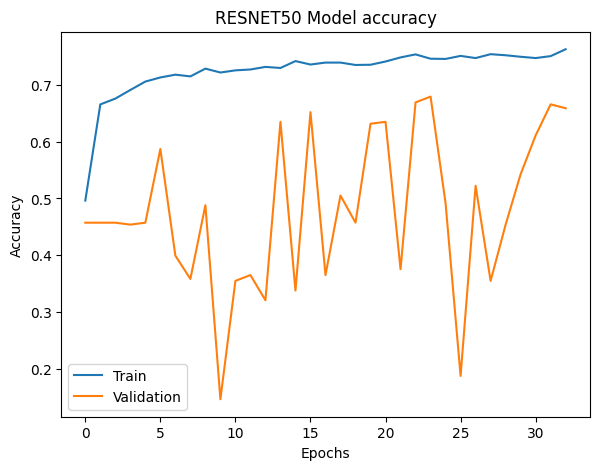

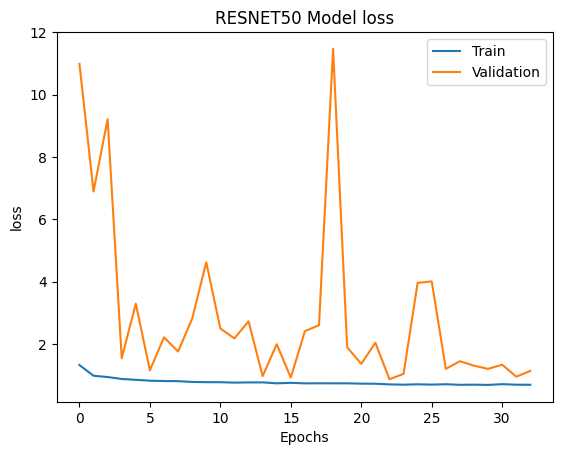

In [ ]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RESNET50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RESNET50 Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
a2=[]
for i in range(0,733):
  a2.append(np.argmax(res_predictions[i],axis=0))
len(a2)

733

In [ ]:
confusion_matrix=metrics.confusion_matrix(b,a2)

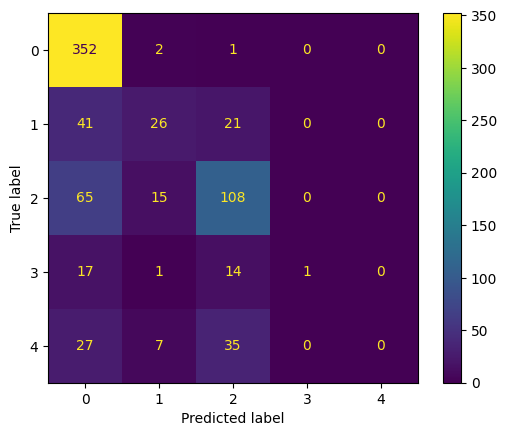

In [ ]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

In [ ]:
def test_img(test_impath):
  imgs=[]
  img=Image.open(test_impath)
  img=img.resize(size=(128,128))
  img=np.array(img,dtype=np.float16)/255
  imgs.append(img)
  del img
  return np.array(imgs)

In [ ]:
demo=test_img('/content/drive/Shareddrives/Project2024/samplelabels /label_0/33_right.jpg')

In [ ]:
#img= np.expand_dims(demo, axis=0)
demo.shape

(1, 128, 128, 3)

In [ ]:
vggmodel=models.load_model('my_cnn.h5')
#model.load_weights(checkpoint_filepath)
pre=vggmodel.predict(demo)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 258ms/step


In [ ]:
print(np.argmax(pre))

0
